<a href="https://colab.research.google.com/github/Claudia060392/Portafolio-Ciencia-de-Datos/blob/main/Practicas%20Consolidadas/Modulo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Carga del archivo manualmente
archivo = files.upload()

# Lectura del CSV
df = pd.read_csv("dataset_natalidad.csv")

# Primeras filas
print(df.head())

Saving dataset_natalidad.csv to dataset_natalidad.csv
     País  PIB_per_capita  Acceso_Salud  Nivel_Educativo  \
0  País_1    25599.706537     51.571459        14.630475   
1  País_2    57289.286853     81.820521         6.262099   
2  País_3    45259.666800     65.717799         7.424431   
3  País_4    37926.216631     75.428535        18.478313   
4  País_5    13581.025224     95.378324        14.096436   

   Tasa_Empleo_Femenino  Edad_Maternidad  Urbanizacion  Tasa_Natalidad  
0             32.584086        21.546858     71.889703       38.613409  
1             56.567732        33.538294     62.165782       19.211764  
2             57.031756        27.578786     48.571657       26.556891  
3             61.871495        32.396862     78.827701       29.177172  
4             66.304567        24.800744     71.083870       40.000000  


Dimensiones: (100, 8)
Primeras filas:
     País  PIB_per_capita  Acceso_Salud  Nivel_Educativo  \
0  País_1    25599.706537     51.571459        14.630475   
1  País_2    57289.286853     81.820521         6.262099   
2  País_3    45259.666800     65.717799         7.424431   
3  País_4    37926.216631     75.428535        18.478313   
4  País_5    13581.025224     95.378324        14.096436   

   Tasa_Empleo_Femenino  Edad_Maternidad  Urbanizacion  Tasa_Natalidad  
0             32.584086        21.546858     71.889703       38.613409  
1             56.567732        33.538294     62.165782       19.211764  
2             57.031756        27.578786     48.571657       26.556891  
3             61.871495        32.396862     78.827701       29.177172  
4             66.304567        24.800744     71.083870       40.000000  

Tipos de datos:
País                     object
PIB_per_capita          float64
Acceso_Salud            float64
Nivel_Educativo         float64
Tasa_Empleo_Femeni

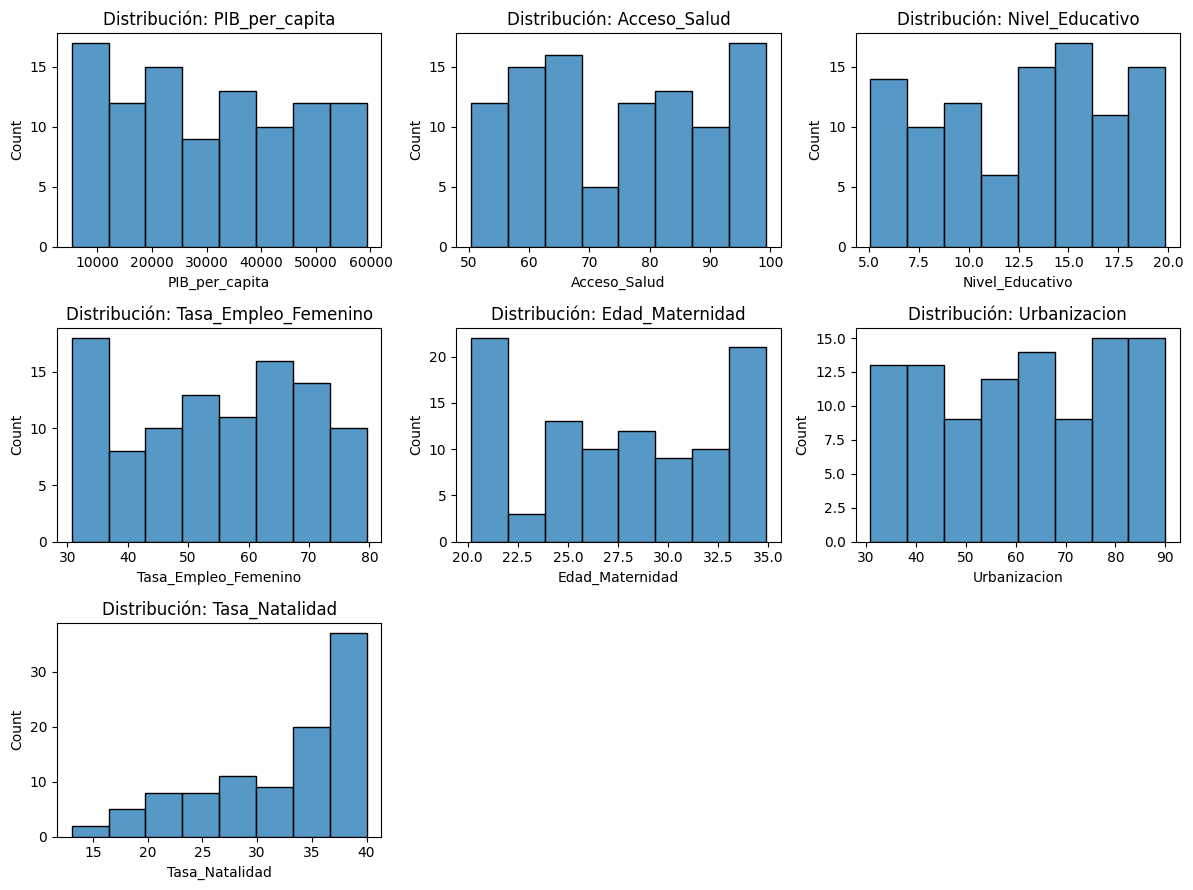

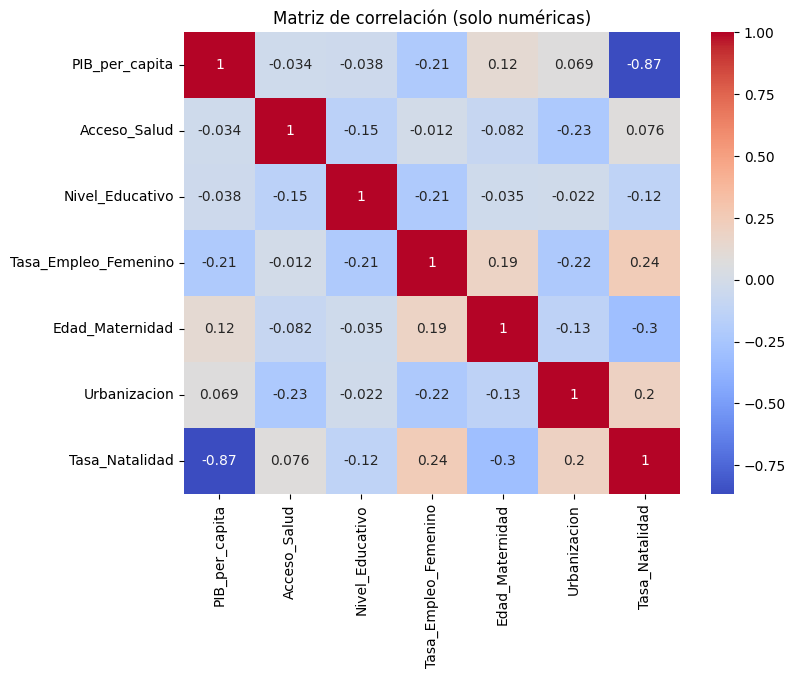


Dimensiones de X e y: (100, 105) (100,)

Entrenando config: act=relu | lr=0.001 | L2=0.01 | dropout=0.3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
-> MAE=22.3131 | MSE=542.4147 | R²=-6.5425

Entrenando config: act=relu | lr=0.01 | L2=0.01 | dropout=0.3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
-> MAE=21.4997 | MSE=518.7775 | R²=-6.2138

Entrenando config: act=tanh | lr=0.001 | L2=0.01 | dropout=0.3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
-> MAE=31.4405 | MSE=1061.0842 | R²=-13.7548

Entrenando config: act=tanh | lr=0.01 | L2=0.01 | dropout=0.3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
-> MAE=31.5975 | MSE=1065.4374 | R²=-13.8153

Resultados comparados (ordenado por MSE):
  activacion     lr    l2  dropout        MAE          MSE         R2
0       relu  0.010  0.01      0.3  21.499726   518.777512  -6.213797
1       relu  0.001  0.01      0.3  22.313147   542.414718  -6.542482
2       tanh  0.001  0.01      0.3  31.440473  1061.084213 -13.754777
3       tanh  0.010  0.01      0.3  31.597470  1065.437383 -13.815309

Mejor configuración: act=relu | lr=0.01 | L2=0.01 | dropout=0.3
Métricas en test: MAE=2

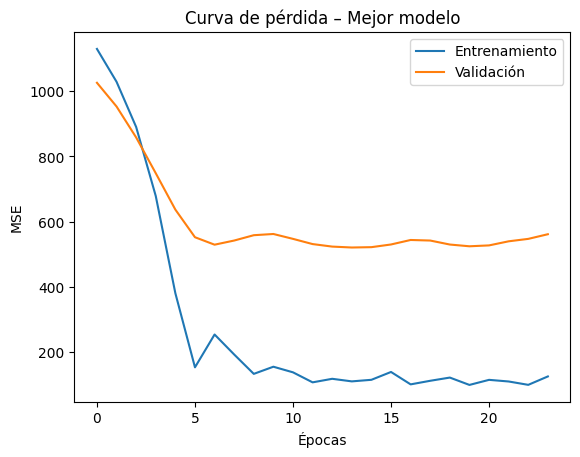

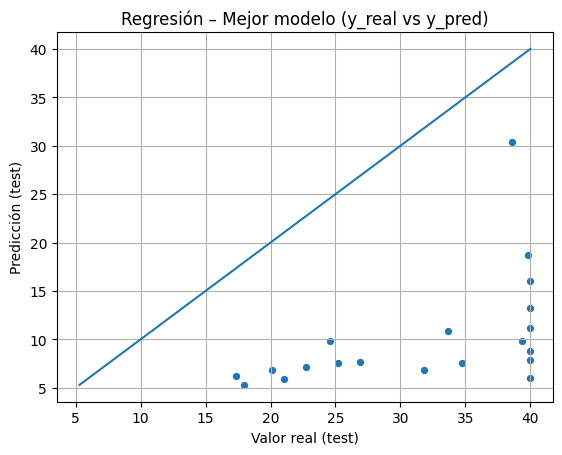

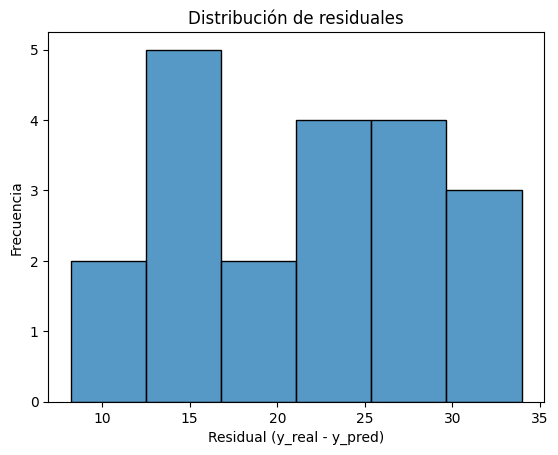


Top 8 variables más influyentes (magnitud media de pesos en 1ª capa):
País_País_14    0.277439
País_País_50    0.267431
País_País_98    0.259452
País_País_57    0.247484
País_País_33    0.244244
País_País_69    0.243415
País_País_21    0.236833
País_País_41    0.235710
dtype: float32


In [6]:
# Evaluación Final – Módulo 8
# Predicción de Tasa_Natalidad con Redes Neuronales Densas (Keras)
# ================================================================

# -----------------------------
# Importaciones
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras import Input, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# -----------------------------
# 1) Carga y normalización de encabezados
# -----------------------------
# Se intenta lectura con codificación estándar; si el encabezado de país queda como 'PaÃ­s',
# se corrige el nombre de la columna a 'País'.
try:
    df = pd.read_csv("dataset_natalidad.csv")
except Exception:
    df = pd.read_csv("dataset_natalidad.csv", encoding="latin-1")

# Se corrige posible encabezado mal decodificado
rename_map = {"PaÃ­s": "País"}
df.rename(columns=rename_map, inplace=True)

print("Dimensiones:", df.shape)
print("Primeras filas:")
print(df.head())
print("\nTipos de datos:")
print(df.dtypes)

# -----------------------------
# 2) Limpieza mínima
# -----------------------------
# Se identifican columnas numéricas y categóricas iniciales
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Se intenta convertir a número aquellas columnas de texto con formato '1,23'
for c in df.columns:
    if df[c].dtype == "object":
        conv = pd.to_numeric(df[c].astype(str).str.replace(",", ".", regex=False), errors="coerce")
        if conv.notna().mean() > 0.8:  # si mayormente son números, se adopta conversión
            df[c] = conv

# Se recalculan listas tras la conversión
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Imputación simple: media para numéricos, moda para categóricos
for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mean())

for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode().iloc[0])

# -----------------------------
# 3) Exploración: distribuciones y correlación
# -----------------------------
# Se grafican histogramas de distribuciones de todas las columnas numéricas
if len(num_cols) > 0:
    cols_a_graficar = num_cols.copy()
    filas = int(np.ceil(len(cols_a_graficar) / 3))
    fig, axes = plt.subplots(nrows=filas, ncols=3, figsize=(12, 3*filas))
            # Nota: si len(cols)<=3, axes puede ser un objeto; se normaliza a arreglo
    axes = np.array(axes).reshape(-1) if isinstance(axes, np.ndarray) else np.array([axes])
    for i, col in enumerate(cols_a_graficar):
        sns.histplot(df[col], kde=False, ax=axes[i])
        axes[i].set_title(f"Distribución: {col}")
    for j in range(i+1, len(axes)):
        axes[j].axis("off")
    plt.tight_layout()
    plt.show()

# Se calcula correlación solo con variables numéricas para evitar errores
if len(num_cols) >= 2:
    plt.figure(figsize=(8, 6))
    corr_num = df[num_cols].corr()
    sns.heatmap(corr_num, annot=True, cmap="coolwarm")
    plt.title("Matriz de correlación (solo numéricas)")
    plt.show()

# -----------------------------
# 4) Definición de X e y
# -----------------------------
# Se asume que la variable objetivo del enunciado es 'Tasa_Natalidad'
objetivo = "Tasa_Natalidad"
if objetivo not in df.columns:
    raise ValueError(f"No se encontró la columna objetivo '{objetivo}' en el CSV.")

y = df[objetivo].copy()
X = df.drop(columns=[objetivo]).copy()

# Se codifica la columna País si está como categórica
if "País" in X.columns and X["País"].dtype == "object":
    X = pd.get_dummies(X, columns=["País"], drop_first=True)

# Se asegura que X sea completamente numérico y sin nulos
X = X.apply(pd.to_numeric, errors="coerce")
X = X.fillna(X.mean(numeric_only=True))

print("\nDimensiones de X e y:", X.shape, y.shape)

# -----------------------------
# 5) Escalado y división train/test
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# 6) Función para construir el modelo (2 capas ocultas, regularización)
# -----------------------------
def construir_modelo(input_dim, activacion="relu", lr=1e-3, l2=0.01, p_dropout=0.3):
    # Se define un modelo secuencial con capa de entrada explícita (evita warnings)
    modelo = Sequential([
        Input(shape=(input_dim,)),
        Dense(32, activation=activacion, kernel_regularizer=regularizers.l2(l2)),
        Dropout(p_dropout),
        Dense(16, activation=activacion, kernel_regularizer=regularizers.l2(l2)),
        Dropout(p_dropout),
        Dense(1, activation=None)  # salida para regresión
    ])
    modelo.compile(optimizer=Adam(learning_rate=lr), loss="mse", metrics=["mae"])
    return modelo

# -----------------------------
# 7) Comparación de configuraciones (activación x learning rate)
# -----------------------------
configuraciones = []
for activacion in ["relu", "tanh"]:
    for lr in [1e-3, 1e-2]:
        configuraciones.append({"activacion": activacion, "lr": lr, "l2": 0.01, "dropout": 0.3})

resultados = []

for cfg in configuraciones:
    print(f"\nEntrenando config: act={cfg['activacion']} | lr={cfg['lr']} | L2={cfg['l2']} | dropout={cfg['dropout']}")
    modelo = construir_modelo(
        input_dim=X_train.shape[1],
        activacion=cfg["activacion"],
        lr=cfg["lr"],
        l2=cfg["l2"],
        p_dropout=cfg["dropout"]
    )
    early = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    hist = modelo.fit(
        X_train, y_train,
        epochs=120, batch_size=16,
        validation_data=(X_test, y_test),
        verbose=0, callbacks=[early]
    )
    # Evaluación en test
    y_pred = modelo.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    resultados.append({
        "activacion": cfg["activacion"],
        "lr": cfg["lr"],
        "l2": cfg["l2"],
        "dropout": cfg["dropout"],
        "MAE": mae, "MSE": mse, "R2": r2,
        "modelo": modelo,
        "hist": hist.history,
        "y_pred": y_pred
    })
    print(f"-> MAE={mae:.4f} | MSE={mse:.4f} | R²={r2:.4f}")

# -----------------------------
# 8) Selección del mejor por MSE y tabla de resultados
# -----------------------------
res_df = pd.DataFrame([{k:v for k,v in r.items() if k not in ("modelo","hist","y_pred")} for r in resultados])
res_df = res_df.sort_values(by="MSE").reset_index(drop=True)
print("\nResultados comparados (ordenado por MSE):")
print(res_df)

mejor = sorted(resultados, key=lambda d: d["MSE"])[0]
mejor_modelo = mejor["modelo"]
y_pred_best = mejor["y_pred"]

print(f"\nMejor configuración: act={mejor['activacion']} | lr={mejor['lr']} | L2={mejor['l2']} | dropout={mejor['dropout']}")
print(f"Métricas en test: MAE={mejor['MAE']:.4f} | MSE={mejor['MSE']:.4f} | R²={mejor['R2']:.4f}")

# Curva de pérdida del mejor (si se dispone de historial)
if "loss" in mejor["hist"] and "val_loss" in mejor["hist"]:
    plt.plot(mejor["hist"]["loss"], label="Entrenamiento")
    plt.plot(mejor["hist"]["val_loss"], label="Validación")
    plt.xlabel("Épocas")
    plt.ylabel("MSE")
    plt.title("Curva de pérdida – Mejor modelo")
    plt.legend()
    plt.show()

# -----------------------------
# 9) Gráficos: y_real vs y_pred y residuales
# -----------------------------
plt.figure()
plt.scatter(y_test, y_pred_best, s=18)
mn = float(min(y_test.min(), y_pred_best.min()))
mx = float(max(y_test.max(), y_pred_best.max()))
plt.plot([mn, mx], [mn, mx])
plt.xlabel("Valor real (test)")
plt.ylabel("Predicción (test)")
plt.title("Regresión – Mejor modelo (y_real vs y_pred)")
plt.grid(True)
plt.show()

residuales = y_test - y_pred_best
plt.figure()
sns.histplot(residuales, kde=False)
plt.title("Distribución de residuales")
plt.xlabel("Residual (y_real - y_pred)")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------
# 10) Influencia de variables (pesos de la primera capa)
# -----------------------------
primera_capa = None
for layer in mejor_modelo.layers:
    if isinstance(layer, Dense):
        primera_capa = layer
        break

if primera_capa is not None:
    pesos, sesgos = primera_capa.get_weights()
    imp = pd.Series(np.mean(np.abs(pesos), axis=1), index=X.columns).sort_values(ascending=False)
    print("\nTop 8 variables más influyentes (magnitud media de pesos en 1ª capa):")
    print(imp.head(8))
else:
    print("\nNo fue posible leer la primera capa densa para estimar influencia.")

